# Simple example of loading experimental data

In [1]:
import pandas as pd
import sys
from flowmater.graph_util import draw_graph
from flowmater.ExperimentManager import ExperimentManager

In [2]:
#load
em=ExperimentManager()
em.load_experiments("database")
em.classify_experiments()

In [3]:
#show data
df=pd.DataFrame.from_dict(em.database).T
df

,"Proc, add, g","Measure, %, product yield","Proc, Heat, oC",graphID,"Proc, Leave, hours"
database\chart_0,2.0,10.0,25.0,1.0,NaN
database\chart_1,4.0,20.0,50.0,1.0,NaN
database\chart_2,6.0,40.0,70.0,1.0,NaN
database\chart_3,10.0,20.0,80.0,1.0,NaN
database\chart_4,8.0,10.0,100.0,1.0,NaN
database\chart2_0,1.0,60.0,40.0,0.0,24.0
database\chart2_1,5.0,40.0,30.0,0.0,24.0


In [4]:
#show flowcharts
#for graph in em.graph_list:
#    draw_graph(graph)

In [5]:
#calcualte fingerprint of florcharts
from flowmater.FlowchartFP import FlowchartFP
FFP=FlowchartFP(em.graph_list)
graph_fp_dict={num:FFP(g) for num,g in enumerate(em.graph_list)}

#merge dataframe
fp_df=pd.DataFrame.from_dict(graph_fp_dict).T
fp_df.columns=["FP_"+i for i in FFP.v_to_i.keys()]
merge_df=pd.merge(df,fp_df,left_on="graphID",right_index=True)
merge_df

,"Proc, add, g","Measure, %, product yield","Proc, Heat, oC",graphID,"Proc, Leave, hours","FP_Measure, %, product yield<-->Proc, Leave, hours","FP_Proc, Leave, hours<-->Measure, %, product yield--Proc, Heat, oC","FP_Proc, Heat, oC<-->Measure, %, product yield--Proc, add, g","FP_Proc, Heat, oC<-->Proc, Leave, hours--Proc, add, g","FP_Proc, add, g<-->Proc, Heat, oC","FP_Measure, %, product yield<-->Proc, Heat, oC"
database\chart_0,2.0,10.0,25.0,1.0,NaN,1,1,0,1,1,0
database\chart_1,4.0,20.0,50.0,1.0,NaN,1,1,0,1,1,0
database\chart_2,6.0,40.0,70.0,1.0,NaN,1,1,0,1,1,0
database\chart_3,10.0,20.0,80.0,1.0,NaN,1,1,0,1,1,0
database\chart_4,8.0,10.0,100.0,1.0,NaN,1,1,0,1,1,0
database\chart2_0,1.0,60.0,40.0,0.0,24.0,0,0,1,0,1,1
database\chart2_1,5.0,40.0,30.0,0.0,24.0,0,0,1,0,1,1


In [6]:
#simplify database (drop columns of duplicates)
simple_cols=[]
for col in merge_df.columns:
    if len(list(merge_df[col].drop_duplicates()))>1:
        simple_cols.append(col)
        
merge_df[simple_cols]

,"Proc, add, g","Measure, %, product yield","Proc, Heat, oC",graphID,"Proc, Leave, hours","FP_Measure, %, product yield<-->Proc, Leave, hours","FP_Proc, Leave, hours<-->Measure, %, product yield--Proc, Heat, oC","FP_Proc, Heat, oC<-->Measure, %, product yield--Proc, add, g","FP_Proc, Heat, oC<-->Proc, Leave, hours--Proc, add, g","FP_Measure, %, product yield<-->Proc, Heat, oC"
database\chart_0,2.0,10.0,25.0,1.0,NaN,1,1,0,1,0
database\chart_1,4.0,20.0,50.0,1.0,NaN,1,1,0,1,0
database\chart_2,6.0,40.0,70.0,1.0,NaN,1,1,0,1,0
database\chart_3,10.0,20.0,80.0,1.0,NaN,1,1,0,1,0
database\chart_4,8.0,10.0,100.0,1.0,NaN,1,1,0,1,0
database\chart2_0,1.0,60.0,40.0,0.0,24.0,0,0,1,0,1
database\chart2_1,5.0,40.0,30.0,0.0,24.0,0,0,1,0,1


In [7]:
#fill nan
target_df=merge_df.fillna(merge_df.mean())
target_df

,"Proc, add, g","Measure, %, product yield","Proc, Heat, oC",graphID,"Proc, Leave, hours","FP_Measure, %, product yield<-->Proc, Leave, hours","FP_Proc, Leave, hours<-->Measure, %, product yield--Proc, Heat, oC","FP_Proc, Heat, oC<-->Measure, %, product yield--Proc, add, g","FP_Proc, Heat, oC<-->Proc, Leave, hours--Proc, add, g","FP_Proc, add, g<-->Proc, Heat, oC","FP_Measure, %, product yield<-->Proc, Heat, oC"
database\chart_0,2.0,10.0,25.0,1.0,24.0,1,1,0,1,1,0
database\chart_1,4.0,20.0,50.0,1.0,24.0,1,1,0,1,1,0
database\chart_2,6.0,40.0,70.0,1.0,24.0,1,1,0,1,1,0
database\chart_3,10.0,20.0,80.0,1.0,24.0,1,1,0,1,1,0
database\chart_4,8.0,10.0,100.0,1.0,24.0,1,1,0,1,1,0
database\chart2_0,1.0,60.0,40.0,0.0,24.0,0,0,1,0,1,1
database\chart2_1,5.0,40.0,30.0,0.0,24.0,0,0,1,0,1,1


In [8]:
y_column="Measure, %, product yield"
X_columns=list(target_df.columns)
X_columns.remove(y_column)
X_columns.remove("graphID")

In [9]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(target_df[X_columns],target_df[y_column])
model.predict(target_df[X_columns])

array([21. , 22.6, 34.4, 21.5, 16.8, 50.9, 42. ])

In [10]:
#show important params
for k,v in zip(X_columns,model.feature_importances_):
    print("{:.2f}:  {:}".format(v,k))

0.35:  Proc, add, g
0.26:  Proc, Heat, oC
0.00:  Proc, Leave, hours
0.09:  FP_Measure, %, product yield<-->Proc, Leave, hours
0.10:  FP_Proc, Leave, hours<-->Measure, %, product yield--Proc, Heat, oC
0.07:  FP_Proc, Heat, oC<-->Measure, %, product yield--Proc, add, g
0.07:  FP_Proc, Heat, oC<-->Proc, Leave, hours--Proc, add, g
0.00:  FP_Proc, add, g<-->Proc, Heat, oC
0.07:  FP_Measure, %, product yield<-->Proc, Heat, oC


In [11]:
#predict manual condition
manual_X=[[
    2,
    25,
    29,
    1,
    1,
    1,
    0,
    0,
    1
]]

In [12]:
import numpy as np
model.predict(np.array(manual_X))

array([32.7])

# Visualize by decision tree

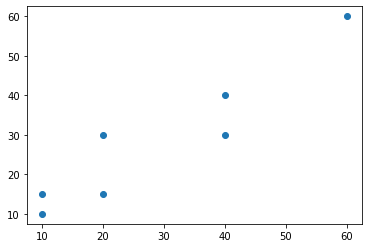

In [15]:
from sklearn.tree import DecisionTreeRegressor,plot_tree
import matplotlib.pyplot as plt


#decisiontree
model=DecisionTreeRegressor(max_depth=3)
model.fit(target_df[X_columns],target_df[y_column])

#plot prediction
pred_Y=model.predict(target_df[X_columns])
plt.scatter(target_df[y_column],pred_Y)

[Text(496.0, 951.3000000000001, 'FP_Proc, Heat, oC<-->Proc, Leave, hours--Proc, add, g <= 0.5\nmse = 297.959\nsamples = 100.0%\nvalue = 28.571'),
 Text(248.0, 679.5, 'Proc, add, g <= 3.0\nmse = 100.0\nsamples = 28.6%\nvalue = 50.0'),
 Text(124.0, 407.70000000000005, 'mse = 0.0\nsamples = 14.3%\nvalue = 60.0'),
 Text(372.0, 407.70000000000005, 'mse = 0.0\nsamples = 14.3%\nvalue = 40.0'),
 Text(744.0, 679.5, 'Proc, Heat, oC <= 37.5\nmse = 120.0\nsamples = 71.4%\nvalue = 20.0'),
 Text(620.0, 407.70000000000005, 'mse = 0.0\nsamples = 14.3%\nvalue = 10.0'),
 Text(868.0, 407.70000000000005, 'Proc, Heat, oC <= 75.0\nmse = 118.75\nsamples = 57.1%\nvalue = 22.5'),
 Text(744.0, 135.89999999999998, 'mse = 100.0\nsamples = 28.6%\nvalue = 30.0'),
 Text(992.0, 135.89999999999998, 'mse = 25.0\nsamples = 28.6%\nvalue = 15.0')]

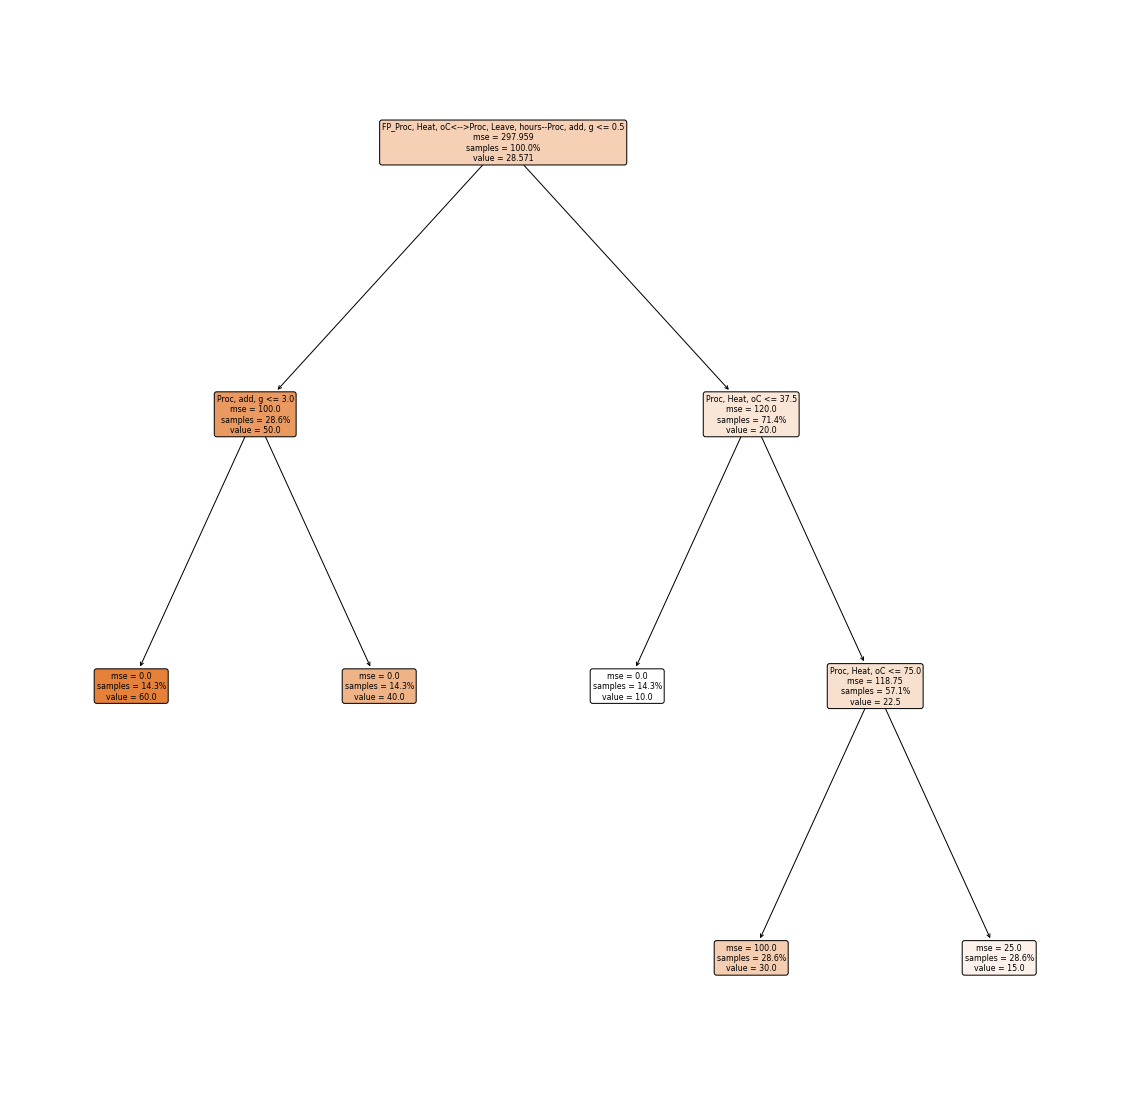

In [18]:
plt.figure(figsize=(20,20))
plot_tree(model,
          feature_names=X_columns,
          filled=True, rounded=True, proportion=True)
